In [1]:
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

import utils
import autoencoders

In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


### Util functions

In [3]:
def plot_mnist_images(batch):
    plt.figure(figsize=(20, 4))
    for i in range(10):
        ax = plt.subplot(2, 10, i + 1)
        plt.imshow(batch[i].squeeze())
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

def plot_losses(losses, title='Evaluation losses'):
    plt.plot([i + 1 for i in range(len(losses))], losses, 'red')
    plt.title(title)
    plt.show()

def plot_results(mean_loss, batch_data):
    (x, y, y_hat) = batch_data
    print(f'Mean loss: {round(mean_loss, 4)}')
    print('Input')
    plot_mnist_images(x)
    print('Target')
    plot_mnist_images(y)
    print('Generated')
    plot_mnist_images(y_hat)

# MNIST

In [4]:
(mnist_train, mnist_eval, mnist_test) = utils.load_dataset('mnist')

### Build autoencoders

Default:
- Encoder:
    - Flatten
    - Dense = 128, relu
- Decoder:
    - Dense = 784, sigmoid
    - Reshape = (28, 28)

Conv:
- Encoder:
    - Conv 2D = 16, (3, 3), relu, strides=2
    - Conv 2D = 8, (3, 3), relu, strides=2
- Decoder:
    - Conv 2D Transpose = 8, (3), relu, strides=2
    - Conv 2D Transpose = 16, (3), relu, strides=2
    - Conv 2D = 1, (3, 3), sigmoid

In [5]:
encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
])

decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation='sigmoid'),
    tf.keras.layers.Reshape((28, 28))
])

conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
])

conv_decoder = tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')
])

training start
epoch 1/20 - mean loss 0.0557
epoch 2/20 - mean loss 0.0404
epoch 3/20 - mean loss 0.0329
epoch 4/20 - mean loss 0.0277
epoch 5/20 - mean loss 0.0237
epoch 6/20 - mean loss 0.0206
epoch 7/20 - mean loss 0.0181
epoch 8/20 - mean loss 0.016
epoch 9/20 - mean loss 0.0143
epoch 10/20 - mean loss 0.0128
epoch 11/20 - mean loss 0.0115
epoch 12/20 - mean loss 0.0104
epoch 13/20 - mean loss 0.0095
epoch 14/20 - mean loss 0.0086
epoch 15/20 - mean loss 0.0079
epoch 16/20 - mean loss 0.0073
epoch 17/20 - mean loss 0.0068
epoch 18/20 - mean loss 0.0063
epoch 19/20 - mean loss 0.0059
epoch 20/20 - mean loss 0.0055
training stop


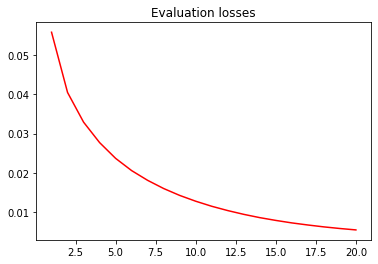

In [6]:
default_mnist_autoencoder = autoencoders.Autoencoder(encoder, decoder)
eval_losses = default_mnist_autoencoder.fit(mnist_train, mnist_eval, epochs=20)
plot_losses(eval_losses)

Mean loss: 0.0053
Input


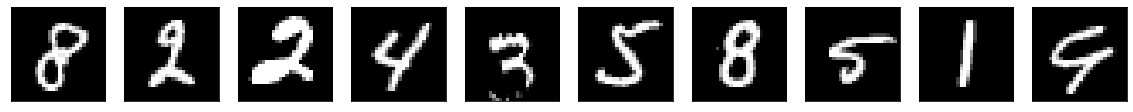

Target


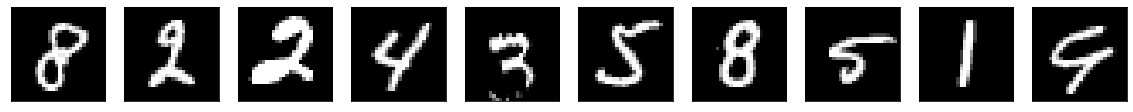

Generated


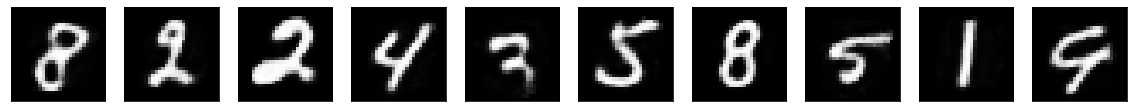

In [7]:
plot_results(*default_mnist_autoencoder.evaluate(mnist_test))

training start
epoch 1/14 - mean loss 0.018
epoch 2/14 - mean loss 0.0093
epoch 3/14 - mean loss 0.007
epoch 4/14 - mean loss 0.0057
epoch 5/14 - mean loss 0.0048
epoch 6/14 - mean loss 0.0042
epoch 7/14 - mean loss 0.0037
epoch 8/14 - mean loss 0.0033
epoch 9/14 - mean loss 0.003
epoch 10/14 - mean loss 0.0027
epoch 11/14 - mean loss 0.0025
epoch 12/14 - mean loss 0.0024
epoch 13/14 - mean loss 0.0022
epoch 14/14 - mean loss 0.0021
training stop


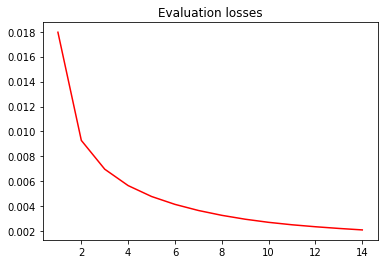

In [8]:
conv_mnist_autoencoder = autoencoders.Autoencoder(conv_encoder, conv_decoder)
eval_losses = conv_mnist_autoencoder.fit(mnist_train, mnist_eval, epochs=14)
plot_losses(eval_losses)

Mean loss: 0.0021
Input


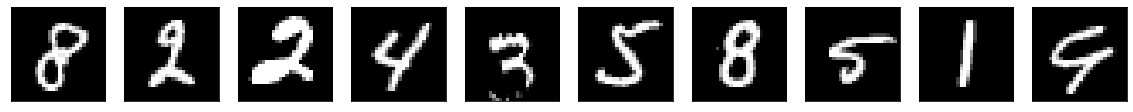

Target


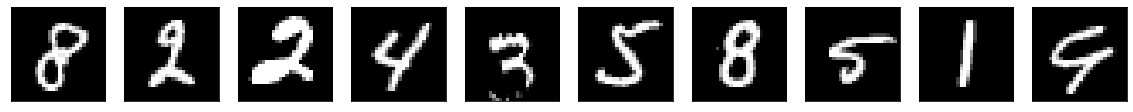

Generated


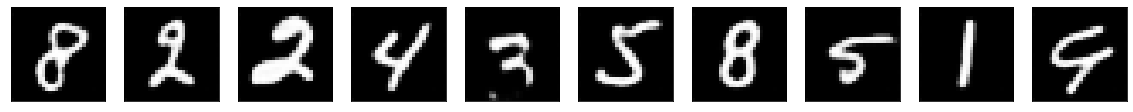

In [9]:
plot_results(*conv_mnist_autoencoder.evaluate(mnist_test))

# Noise reduction with noisy MNIST

In [10]:
(noisy_mnist_train, noisy_mnist_eval, noisy_mnist_test) = utils.load_dataset('noisy_mnist')

training start
epoch 1/20 - mean loss 0.0089
epoch 2/20 - mean loss 0.0086
epoch 3/20 - mean loss 0.0083
epoch 4/20 - mean loss 0.0081
epoch 5/20 - mean loss 0.008
epoch 6/20 - mean loss 0.0078
epoch 7/20 - mean loss 0.0077
epoch 8/20 - mean loss 0.0076
epoch 9/20 - mean loss 0.0075
epoch 10/20 - mean loss 0.0074
epoch 11/20 - mean loss 0.0073
epoch 12/20 - mean loss 0.0072
epoch 13/20 - mean loss 0.0072
epoch 14/20 - mean loss 0.0071
epoch 15/20 - mean loss 0.007
epoch 16/20 - mean loss 0.007
epoch 17/20 - mean loss 0.0069
epoch 18/20 - mean loss 0.0069
epoch 19/20 - mean loss 0.0068
epoch 20/20 - mean loss 0.0068
training stop


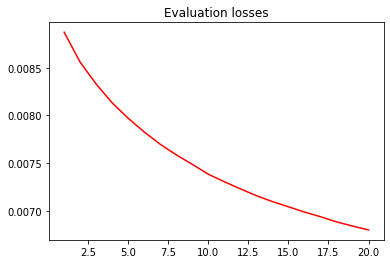

In [11]:
default_noisy_mnist_autoencoder = autoencoders.Autoencoder(encoder, decoder)
eval_losses = default_noisy_mnist_autoencoder.fit(noisy_mnist_train, noisy_mnist_eval, epochs=20)
plot_losses(eval_losses)

Mean loss: 0.0066
Input


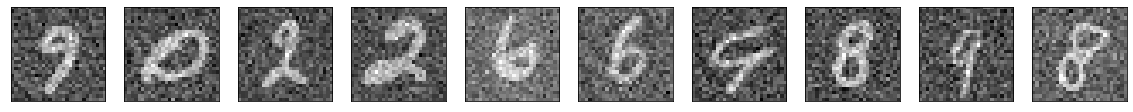

Target


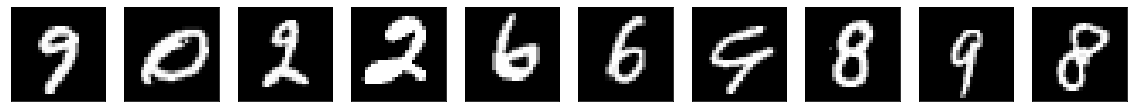

Generated


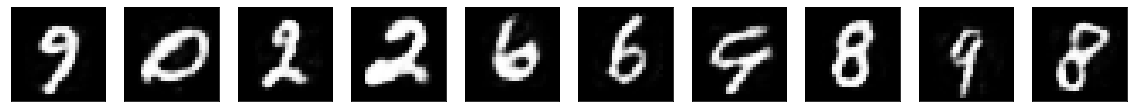

In [12]:
plot_results(*default_noisy_mnist_autoencoder.evaluate(noisy_mnist_test))

training start
epoch 1/14 - mean loss 0.0063
epoch 2/14 - mean loss 0.0059
epoch 3/14 - mean loss 0.0057
epoch 4/14 - mean loss 0.0056
epoch 5/14 - mean loss 0.0055
epoch 6/14 - mean loss 0.0054
epoch 7/14 - mean loss 0.0053
epoch 8/14 - mean loss 0.0053
epoch 9/14 - mean loss 0.0052
epoch 10/14 - mean loss 0.0051
epoch 11/14 - mean loss 0.0051
epoch 12/14 - mean loss 0.005
epoch 13/14 - mean loss 0.005
epoch 14/14 - mean loss 0.005
training stop


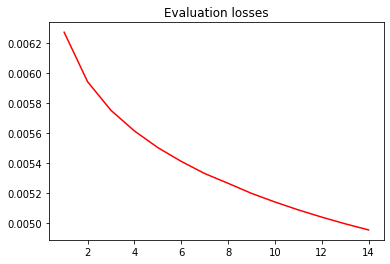

In [13]:
conv_noisy_mnist_autoencoder = autoencoders.Autoencoder(conv_encoder, conv_decoder)
eval_losses = conv_noisy_mnist_autoencoder.fit(noisy_mnist_train, noisy_mnist_eval, epochs=14)
plot_losses(eval_losses)

Mean loss: 0.0049
Input


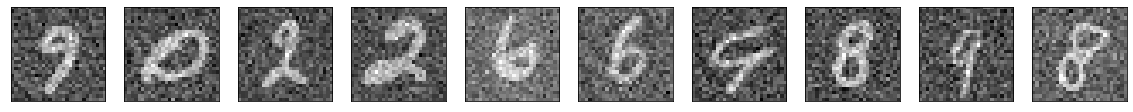

Target


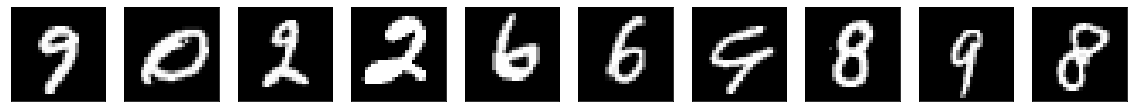

Generated


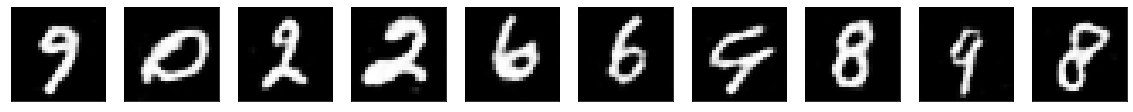

In [14]:
plot_results(*conv_noisy_mnist_autoencoder.evaluate(noisy_mnist_test))

# Fashion MNIST

In [15]:
(fashion_mnist_train, fashion_mnist_eval, fashion_mnist_test) = utils.load_dataset('fashion_mnist')

training start
epoch 1/20 - mean loss 0.0302
epoch 2/20 - mean loss 0.0225
epoch 3/20 - mean loss 0.0191
epoch 4/20 - mean loss 0.0171
epoch 5/20 - mean loss 0.0154
epoch 6/20 - mean loss 0.014
epoch 7/20 - mean loss 0.0133
epoch 8/20 - mean loss 0.0125
epoch 9/20 - mean loss 0.0118
epoch 10/20 - mean loss 0.0113
epoch 11/20 - mean loss 0.0108
epoch 12/20 - mean loss 0.0104
epoch 13/20 - mean loss 0.0101
epoch 14/20 - mean loss 0.0098
epoch 15/20 - mean loss 0.0096
epoch 16/20 - mean loss 0.0094
epoch 17/20 - mean loss 0.0092
epoch 18/20 - mean loss 0.009
epoch 19/20 - mean loss 0.0089
epoch 20/20 - mean loss 0.0087
training stop


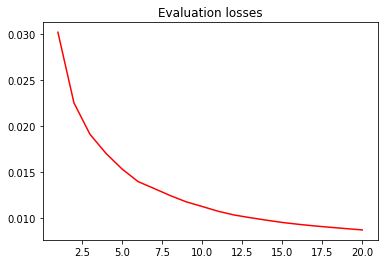

In [16]:
default_fashion_mnist_autoencoder = autoencoders.Autoencoder(encoder, decoder)
eval_losses = default_fashion_mnist_autoencoder.fit(fashion_mnist_train, fashion_mnist_eval, epochs=20)
plot_losses(eval_losses)

Mean loss: 0.0089
Input


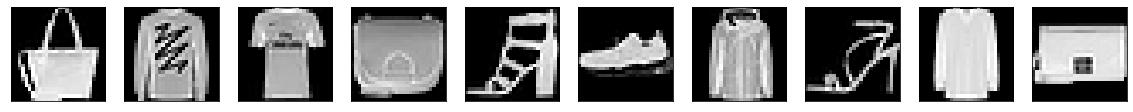

Target


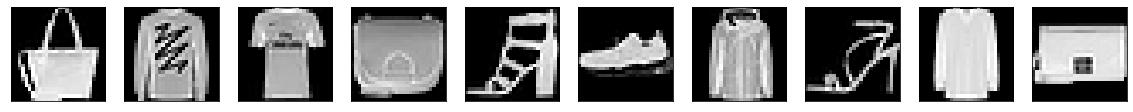

Generated


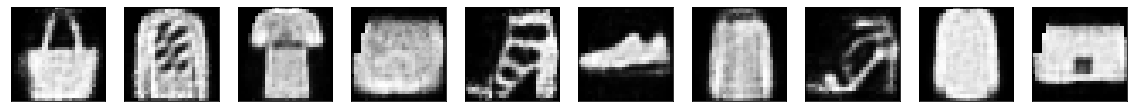

In [17]:
plot_results(*default_fashion_mnist_autoencoder.evaluate(fashion_mnist_test))

training start
epoch 1/20 - mean loss 0.007
epoch 2/20 - mean loss 0.0063
epoch 3/20 - mean loss 0.006
epoch 4/20 - mean loss 0.0057
epoch 5/20 - mean loss 0.0055
epoch 6/20 - mean loss 0.0053
epoch 7/20 - mean loss 0.0052
epoch 8/20 - mean loss 0.005
epoch 9/20 - mean loss 0.0049
epoch 10/20 - mean loss 0.0048
epoch 11/20 - mean loss 0.0047
epoch 12/20 - mean loss 0.0045
epoch 13/20 - mean loss 0.0043
epoch 14/20 - mean loss 0.0041
epoch 15/20 - mean loss 0.0039
epoch 16/20 - mean loss 0.0037
epoch 17/20 - mean loss 0.0036
epoch 18/20 - mean loss 0.0035
epoch 19/20 - mean loss 0.0034
epoch 20/20 - mean loss 0.0034
training stop


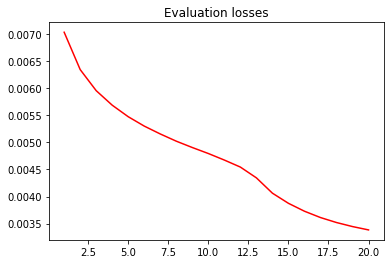

In [18]:
conv_fashion_mnist_autoencoder = autoencoders.Autoencoder(conv_encoder, conv_decoder)
eval_losses = conv_fashion_mnist_autoencoder.fit(fashion_mnist_train, fashion_mnist_eval, epochs=20)
plot_losses(eval_losses)

Mean loss: 0.0034
Input


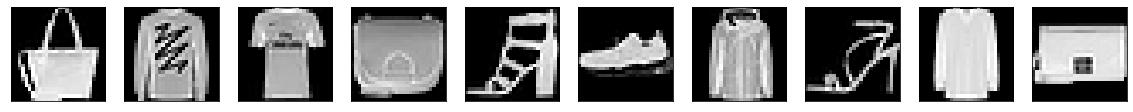

Target


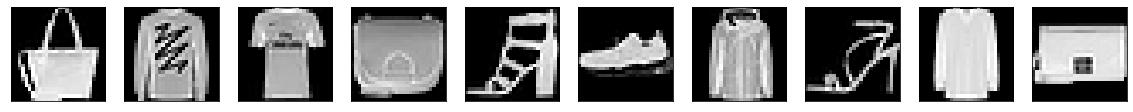

Generated


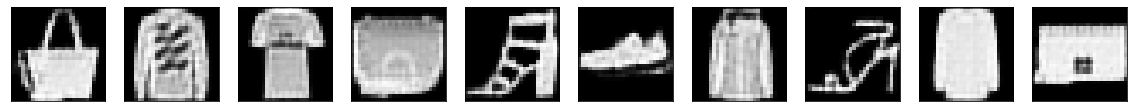

In [19]:
plot_results(*conv_fashion_mnist_autoencoder.evaluate(fashion_mnist_test))

# Noise reduction with noisy Fashion MNIST

In [20]:
(noisy_fashion_mnist_train, noisy_fashion_mnist_eval, noisy_fashion_mnist_test) = utils.load_dataset('noisy_fashion_mnist')

training start
epoch 1/20 - mean loss 0.0154
epoch 2/20 - mean loss 0.0149
epoch 3/20 - mean loss 0.0145
epoch 4/20 - mean loss 0.0143
epoch 5/20 - mean loss 0.014
epoch 6/20 - mean loss 0.0138
epoch 7/20 - mean loss 0.0136
epoch 8/20 - mean loss 0.0134
epoch 9/20 - mean loss 0.0132
epoch 10/20 - mean loss 0.0131
epoch 11/20 - mean loss 0.013
epoch 12/20 - mean loss 0.0128
epoch 13/20 - mean loss 0.0127
epoch 14/20 - mean loss 0.0126
epoch 15/20 - mean loss 0.0126
epoch 16/20 - mean loss 0.0125
epoch 17/20 - mean loss 0.0124
epoch 18/20 - mean loss 0.0124
epoch 19/20 - mean loss 0.0123
epoch 20/20 - mean loss 0.0122
training stop


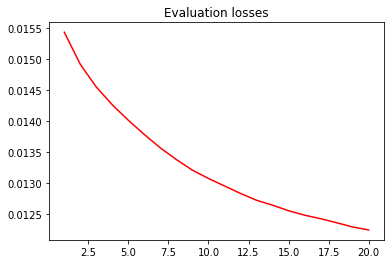

In [21]:
default_noisy_fashion_mnist_autoencoder = autoencoders.Autoencoder(encoder, decoder)
eval_losses = default_noisy_fashion_mnist_autoencoder.fit(noisy_fashion_mnist_train, noisy_fashion_mnist_eval, epochs=20)
plot_losses(eval_losses)

Mean loss: 0.0124
Input


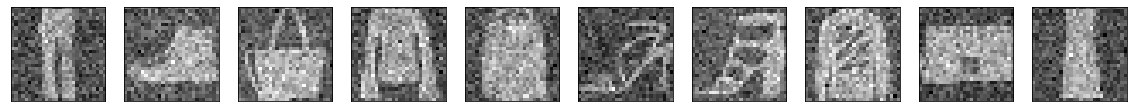

Target


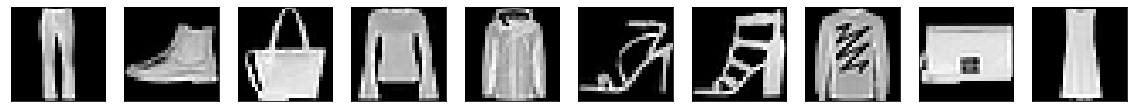

Generated


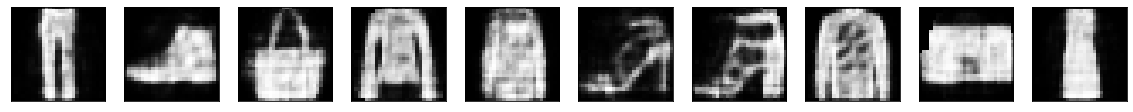

In [22]:
plot_results(*default_noisy_fashion_mnist_autoencoder.evaluate(noisy_fashion_mnist_test))

training start
epoch 1/20 - mean loss 0.0109
epoch 2/20 - mean loss 0.0105
epoch 3/20 - mean loss 0.0103
epoch 4/20 - mean loss 0.0102
epoch 5/20 - mean loss 0.0101
epoch 6/20 - mean loss 0.01
epoch 7/20 - mean loss 0.01
epoch 8/20 - mean loss 0.0099
epoch 9/20 - mean loss 0.0098
epoch 10/20 - mean loss 0.0098
epoch 11/20 - mean loss 0.0098
epoch 12/20 - mean loss 0.0097
epoch 13/20 - mean loss 0.0097
epoch 14/20 - mean loss 0.0097
epoch 15/20 - mean loss 0.0096
epoch 16/20 - mean loss 0.0096
epoch 17/20 - mean loss 0.0096
epoch 18/20 - mean loss 0.0096
epoch 19/20 - mean loss 0.0095
epoch 20/20 - mean loss 0.0095
training stop


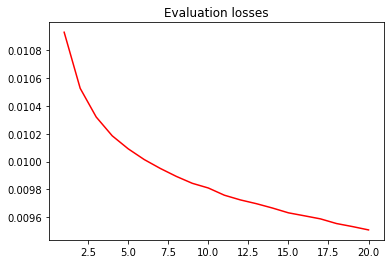

In [23]:
conv_noisy_fashion_mnist_autoencoder = autoencoders.Autoencoder(conv_encoder, conv_decoder)
eval_losses = conv_noisy_fashion_mnist_autoencoder.fit(noisy_fashion_mnist_train, noisy_fashion_mnist_eval, epochs=20)
plot_losses(eval_losses)

Mean loss: 0.0096
Input


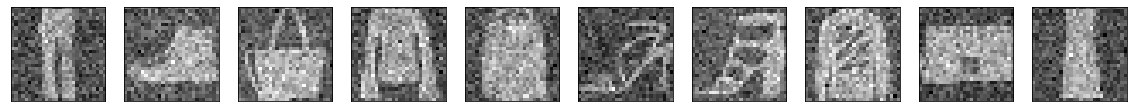

Target


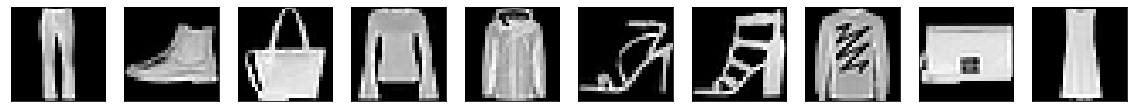

Generated


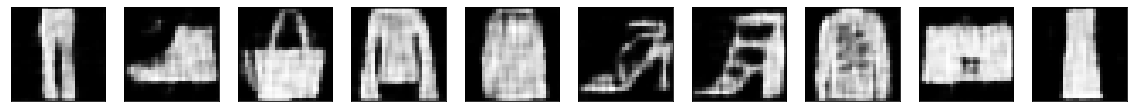

In [24]:
plot_results(*conv_noisy_fashion_mnist_autoencoder.evaluate(noisy_fashion_mnist_test))